# modules() vs children()

`children()` will only return an iterable of the nn.Module objects which are data members.

On other hand, `modules()` goes recursively inside each `nn.Module` object, printing each `nn.Module` object that comes along the way until there are no `nn.module` objects left.

In [1]:
import torch
import torch.nn as nn

class MyNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.convBN =  nn.Sequential(nn.Conv2d(10,10,3), nn.BatchNorm2d(10))
    self.linear =  nn.Linear(10,2)
    
  def forward(self, x):
    pass
  

net = MyNet()

print("Printing children\n------------------------------")
print(list(net.children()))
print("\n\nPrinting Modules\n------------------------------")
print(list(net.modules()))

Printing children
------------------------------
[Sequential(
  (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
), Linear(in_features=10, out_features=2, bias=True)]


Printing Modules
------------------------------
[MyNet(
  (convBN): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Linear(in_features=10, out_features=2, bias=True)
), Sequential(
  (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
), Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1)), BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), Linear(in_features=10, out_features=2, bias=True)]


<img src="figs/children_vs_modules_pytorch-2.png">

## Printing Information about the Network

We may need to print information about the network, whether be it for the user or for debugging purposes. There are 4 such functions.

1. named_parameters. Returns an iterator which gives a tuple containing name of the parameters (if a convolutional layer is assigned as self.conv1, then it's parameters would be conv1.weight and conv1.bias) and the value returned by the __repr__ function of the nn.Parameter

2. named_modules. Same as above, but iterator returns modules like modules() function does.

3. named_children Same as above, but iterator return modules like children() returns

3. named_buffers Return buffer tensors such as running mean average of a Batch Norm layer.

In [3]:
import torch
import torch.nn as nn

class MyNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.convBN =  nn.Sequential(nn.Conv2d(10,10,3), nn.BatchNorm2d(10))
    self.linear =  nn.Linear(10,2)
    
  def forward(self, x):
    pass
  

net = MyNet()

for name, module in net.named_modules():
  print(name, module, "\n-------------------------------")

 MyNet(
  (convBN): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Linear(in_features=10, out_features=2, bias=True)
) 
-------------------------------
convBN Sequential(
  (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
) 
-------------------------------
convBN.0 Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1)) 
-------------------------------
convBN.1 BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) 
-------------------------------
linear Linear(in_features=10, out_features=2, bias=True) 
-------------------------------


## Weight Initialization

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


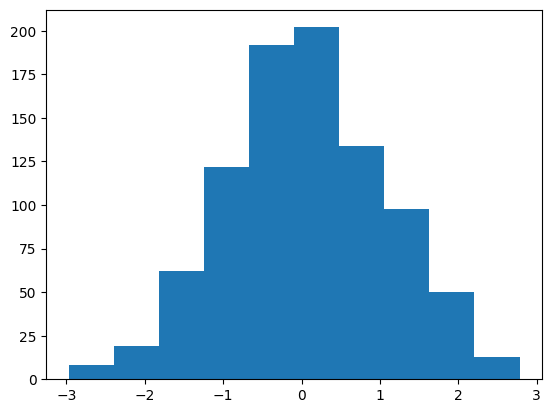

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class MyNet(nn.Module):
 
  def __init__(self):
    super().__init__()
    self.conv = nn.Conv2d(10,10,3)
    self.bn = nn.BatchNorm2d(10)
  
  def weights_init(self):
    for module in self.modules():
      if isinstance(module, nn.Conv2d):
        nn.init.normal_(module.weight, mean = 0, std = 1)
        nn.init.constant_(module.bias, 0)

net = MyNet()
net.weights_init()

for module in net.modules():
  if isinstance(module, nn.Conv2d):
    weights = module.weight
    weights = weights.reshape(-1).detach().cpu().numpy()
    print(module.bias)                                       # Bias to zero
    plt.hist(weights)
    plt.show()